=============初始版本============

In [52]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import seaborn as sns
from scipy import stats
from matplotlib import font_manager
plt.rcParams['font.sans-serif'] = 'Arial'

# CSV文件的列表
csvFilePath = 'D:\\OTA工作\\tmp_csv文件\\match匹配信息\\3APP'
csv_files = os.listdir(csvFilePath)

# 初始化一个空的DataFrame，用于存储所有文件的数据
all_data_app = pd.DataFrame(columns=['distance', 'file'])

for file_name in csv_files:
    data = pd.read_csv(os.path.join(csvFilePath, file_name))
    
    distance = []
    for i in range(data.shape[0]):
        newPos = data.iloc[i].at['newPos']
        pos_1 = data.iloc[i].at['pos_1']
        distance.append((newPos - pos_1) / 1024 / 1024)

    df = pd.DataFrame(distance, columns=['distance'])
    df['file'] = file_name  # 为每个数据点添加文件名
    all_data_app = all_data_app.append(df, ignore_index=True)




C:\Users\10460\AppData\Local\Temp\ipykernel_22312\499531327.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data_app = all_data_app.append(df, ignore_index=True)
C:\Users\10460\AppData\Local\Temp\ipykernel_22312\499531327.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data_app = all_data_app.append(df, ignore_index=True)
C:\Users\10460\AppData\Local\Temp\ipykernel_22312\499531327.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data_app = all_data_app.append(df, ignore_index=True)


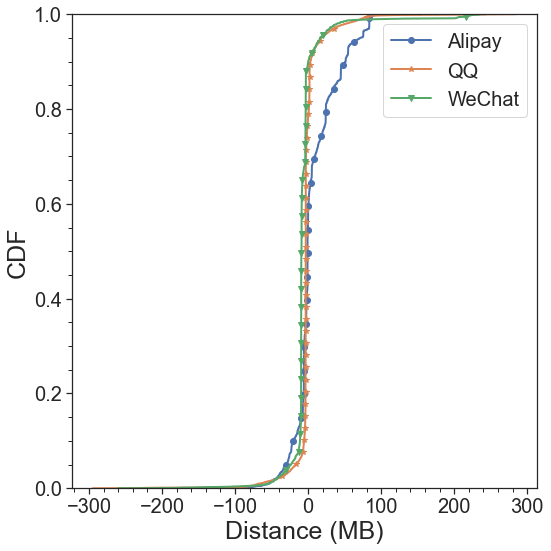

In [55]:
# 绘制CDF图
#sns.set(style="ticks", font_scale=1.5)
fig, ax = plt.subplots(figsize=(8, 8))

sns.ecdfplot(data=all_data_app[all_data_app['file']=='Alipay']['distance'], ax=ax, label='Alipay', lw=2,marker='o',markevery=2000)
sns.ecdfplot(data=all_data_app[all_data_app['file']=='QQ']['distance'], ax=ax, label='QQ', lw=2,marker='*',markevery=12000)
sns.ecdfplot(data=all_data_app[all_data_app['file']=='WeChat']['distance'], ax=ax, label='WeChat',lw=2, marker='v',markevery=12000)

ax.set_ylabel('CDF', fontsize=25)
ax.set_xlabel('Distance (MB)', fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.minorticks_on()
ax.legend(loc='best', fontsize=20)

plt.tight_layout()
plt.savefig('CDF_APP_marker.pdf', bbox_inches='tight')
plt.show()

In [43]:
# CSV文件的列表
csvFilePath = 'D:\\OTA工作\\tmp_csv文件\\match匹配信息\\3GAME'
csv_files = os.listdir(csvFilePath)

# 初始化一个空的DataFrame，用于存储所有文件的数据
all_data_game = pd.DataFrame(columns=['distance', 'file'])

for file_name in csv_files:
    data = pd.read_csv(os.path.join(csvFilePath, file_name))
    
    distance = []
    for i in range(data.shape[0]):
        newPos = data.iloc[i].at['newPos']
        pos_1 = data.iloc[i].at['pos_1']
        distance.append((newPos - pos_1) / 1024 / 1024)

    df = pd.DataFrame(distance, columns=['distance'])
    df['file'] = file_name  # 为每个数据点添加文件名
    all_data_game = all_data_game.append(df, ignore_index=True)

C:\Users\10460\AppData\Local\Temp\ipykernel_22312\220623496.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(df, ignore_index=True)
C:\Users\10460\AppData\Local\Temp\ipykernel_22312\220623496.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(df, ignore_index=True)
C:\Users\10460\AppData\Local\Temp\ipykernel_22312\220623496.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(df, ignore_index=True)


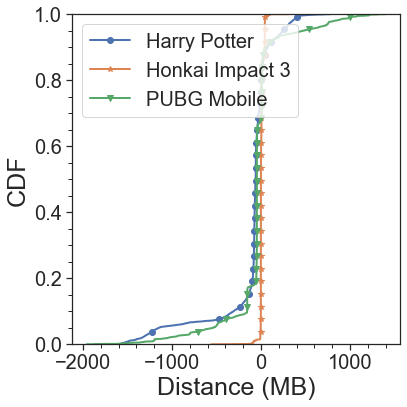

In [59]:
plt.rcParams['font.sans-serif'] = 'Arial'
fig, ax = plt.subplots(figsize=(8, 8))

sns.ecdfplot(data=all_data[all_data['file']=='Harry Potter']['distance'], ax=ax, label='Harry Potter', lw=2,marker='o',markevery=40000)
sns.ecdfplot(data=all_data[all_data['file']=='Honkai Impact3']['distance'], ax=ax, label='Honkai Impact 3', lw=2,marker='*',markevery=40000)
sns.ecdfplot(data=all_data[all_data['file']=='PUBG Mobile']['distance'], ax=ax, label='PUBG Mobile',lw=2, marker='v',markevery=40000)

ax.set_ylabel('CDF', fontsize=25)
ax.set_xlabel('Distance (MB)', fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.minorticks_on()
ax.legend(loc='upper left', fontsize=20)

plt.tight_layout()
plt.savefig('CDF_GAME_marker.pdf', bbox_inches='tight')
plt.show()